In [13]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
DATA_FOLD = 'Data/'

In [14]:
client_data = pd.read_csv(open(DATA_FOLD + "client_data.сsv", 'r'))
impressions_df = pd.read_csv(open(DATA_FOLD + "impressions.сsv", 'r'))

In [26]:
print(client_data.info())
client_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423358 entries, 0 to 423357
Data columns (total 4 columns):
age                24630 non-null float64
create_datetime    146571 non-null object
sex                139405 non-null object
id_user            423358 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ MB
None


,age,create_datetime,sex,id_user
0,NaN,NaN,NaN,766545
1,NaN,NaN,NaN,1319333
2,NaN,NaN,NaN,4201765
3,20.0,2014-01-28 09:41:25.556,male,543544
4,50.0,2017-01-18 22:55:37.230,female,1568031


In [27]:
print(impressions_df.info())
impressions_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652092 entries, 0 to 4652091
Data columns (total 5 columns):
rank                int64
event_datetime_m    object
is_clicked          float64
id_show             int64
id_user             int64
dtypes: float64(1), int64(3), object(1)
memory usage: 177.5+ MB
None


,rank,event_datetime_m,is_clicked,id_show,id_user
0,1,2017-01-12 12:30:00,0.0,5547,906335
1,3,2017-01-12 14:53:00,0.0,5547,5038628
2,4,2017-01-12 17:10:00,0.0,8148,5038628
3,2,2017-01-12 14:48:00,0.0,8131,5038628
4,1,2017-01-12 14:58:00,0.0,8367,5038628


In [28]:
from sklearn.model_selection import train_test_split
X_ext = impressions_df.copy()
X = impressions_df.drop(['is_clicked'], axis = 1)
y = impressions_df.loc[:,['is_clicked']]

In [29]:
X_ext =  pd.merge(X_ext, client_data, how='left', on='id_user')

In [30]:
X_ext.describe()

,rank,is_clicked,id_show,id_user,age
count,4.652092e+06,4.652092e+06,4.652092e+06,4.652092e+06,69726.000000
mean,2.336262e+00,1.550105e-01,1.288384e+04,3.092943e+06,38.018558
std,1.139604e+00,3.619147e-01,8.017852e+03,1.799549e+06,10.589302
min,1.000000e+00,0.000000e+00,0.000000e+00,2.100000e+01,-52.000000
25%,1.000000e+00,0.000000e+00,7.064000e+03,1.555205e+06,32.000000
50%,2.000000e+00,0.000000e+00,1.148600e+04,3.069259e+06,37.000000
75%,3.000000e+00,0.000000e+00,1.777600e+04,4.660422e+06,44.000000
max,4.000000e+00,1.000000e+00,2.710600e+04,6.235875e+06,117.000000


In [31]:
X_ext_train, X_ext_test  = train_test_split(X_ext, shuffle = False, train_size = 0.8)

C:\Users\Vitaly\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Users\Vitaly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Vitaly\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Container object of 9 artists>

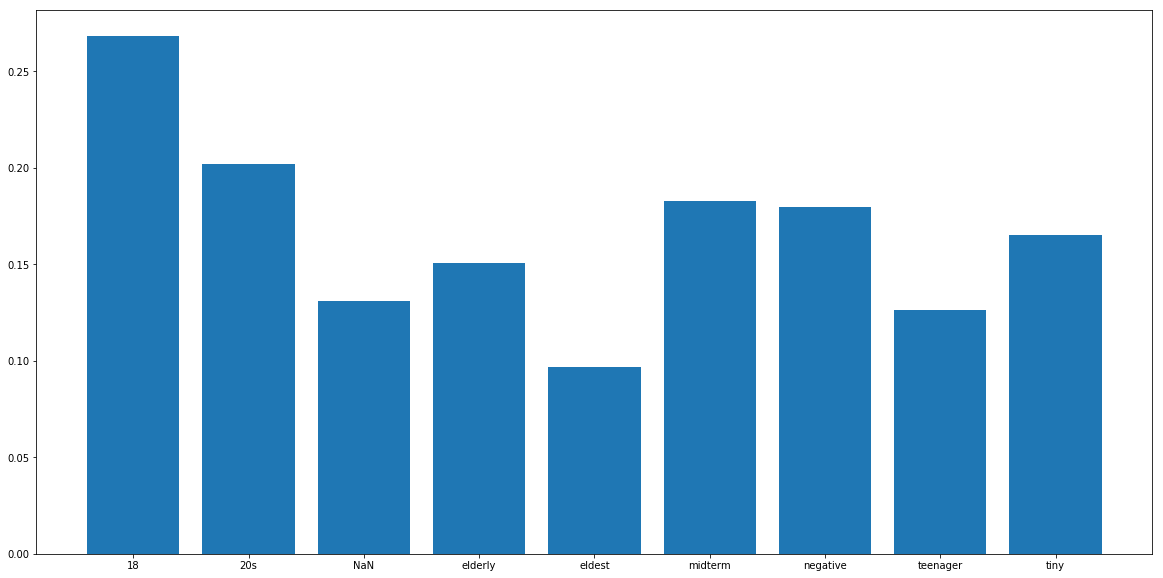

In [94]:
X_ext_train['age_group'] = X_ext_train['age'].fillna(-1000)
X_ext_train['age_group'] = pd.cut(X_ext_train['age_group'], [-1001, -999, 0, 10, 17, 19, 30, 40, 70, 1000 ],
    labels = ['NaN', 'negative', 'tiny', 'teenager', '18',  '20s', 'midterm', 'elderly', 'eldest'])

clicked_by_age = X_ext_train.groupby(['age_group'])['is_clicked'].mean()
plt.figure(figsize=(20,10))
plt.bar(clicked_by_age.index, clicked_by_age.data, align='center')

C:\Users\Vitaly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<Container object of 3 artists>

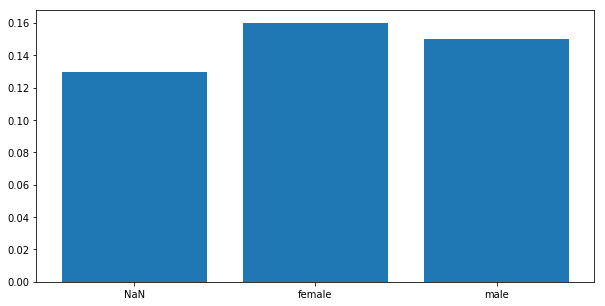

In [99]:
X_ext_train['sex_group'] = X_ext_train['sex'].fillna('NaN')

clicked_by_age = X_ext_train.groupby(['sex_group'])['is_clicked'].mean()
plt.figure(figsize=(10,5))
plt.bar(clicked_by_age.index, clicked_by_age.data, align='center')

<Container object of 4 artists>

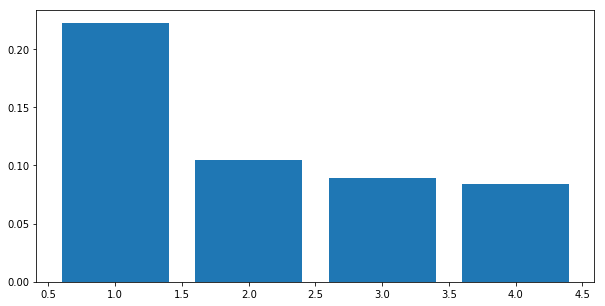

In [100]:
clicked_by_age = X_ext_train.groupby(['rank'])['is_clicked'].mean()
plt.figure(figsize=(10,5))
plt.bar(clicked_by_age.index, clicked_by_age.data, align='center')

In [1]:
import pickle
classes = pickle.load(open('classes.pkl','rb'))

In [2]:
import keras
import keras.applications as zoo

model = zoo.InceptionV3(include_top=True, weights='imagenet')

Using TensorFlow backend.


(300, 300, 3)


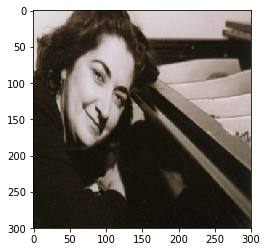

grand piano, grand
top-10 classes are:
0.9753	grand piano
0.0063	upright
0.0030	pool table
0.0006	violin
0.0006	cello
0.0006	photocopier
0.0006	drumstick
0.0004	bow tie
0.0003	harp


In [5]:
from scipy.misc import imresize

img = imresize(plt.imread('Data/images/11820.png'), (300,300))[:,:,:3]

print(img.shape)

plt.imshow(img)
plt.show()

img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))

probs = model.predict(img_preprocessed)

labels = probs.ravel().argsort()[-1:-10:-1]
print(classes[labels[0]])
print ('top-10 classes are:')
for l in labels:
    print ('%.4f\t%s' % (probs.ravel()[l], classes[l].split(',')[0]))

In [10]:
import os
from tqdm import tqdm
folder = 'Data\\images'
image_files = os.listdir(folder)
res = {}
image_names = [image.split('.')[0] for image in  image_files]
for image in tqdm(image_names):
    try:
        img = imresize(plt.imread(os.path.join(folder, image + '.png')), (300,300))[:,:,:3]
        img_preprocessed = zoo.inception_v3.preprocess_input(img[None].astype('float32'))
        probs = model.predict(img_preprocessed)
        l = probs.ravel().argsort()[-1:-2:-1]
        res[image] = classes[l[0]].split(',')[0]
    except:
        continue

100%|██████████████████████████████████████████████████████████████████████████| 26583/26583 [2:29:15<00:00,  2.97it/s]


In [64]:
image_text =pd.DataFrame({'image_id' : [int(i) for i in res.keys()], 'text' : list(res.values())})

image_text.to_csv(DATA_FOLD + 'image_text.csv')

In [65]:
print(image_text.shape)
image_text.head()

(26580, 2)


,image_id,text
0,100004,monastery
1,100014,stage
2,100016,trombone
3,100019,sax
4,100023,bow tie


In [32]:
show_images = pd.read_csv(open(DATA_FOLD + "show_images.сsv", 'r'))

In [44]:
print(show_images.shape)
show_images.tail()

(26597, 2)


,image_id,id_show
26592,126084,55445
26593,126095,55446
26594,126102,21692
26595,126110,55448
26596,126112,55449


In [42]:
mean_click_by_show = X_ext_train.groupby(['id_show'])['is_clicked'].mean()

mean_click_by_show = pd.DataFrame({'id_show' : mean_click_by_show.index, 'is_clicked' : mean_click_by_show.data})

In [45]:
print(mean_click_by_show.shape)
mean_click_by_show.head()

(5942, 2)


,id_show,is_clicked
0,0,0.221577
1,1,0.163043
2,3,0.149057
3,4,0.142857
4,5,0.354430


In [54]:
show_text = pd.merge(show_images, mean_click_by_show, how='left', on='id_show').fillna(0)

In [55]:
print(show_text.shape)
show_text.head(100)

(26597, 3)


,image_id,id_show,is_clicked
0,11813,11600,0.000000
1,11818,9568,0.000000
2,11822,28855,0.000000
3,11827,1453,0.000000
4,11899,28809,0.000000
5,11946,9437,0.000000
6,11950,11631,0.000000
7,11953,11632,0.000000
8,11988,28861,0.000000
9,11996,8134,0.000000


In [66]:
text_clicked = pd.merge(show_text, image_text, on='image_id')

In [67]:
print(text_clicked.shape)
text_clicked.head()

(26580, 4)


,image_id,id_show,is_clicked,text
0,11813,11600,0.0,crate
1,11818,9568,0.0,vestment
2,11822,28855,0.0,stethoscope
3,11827,1453,0.0,theater curtain
4,11899,28809,0.0,web site


In [72]:
mean_click_by_text =  text_clicked.groupby(['text'])['is_clicked'].mean()
mean_click_by_text = pd.DataFrame({'text' : mean_click_by_text.index, 'is_clicked' : mean_click_by_text.data})

In [77]:
mean_click_by_text.sort_values(['is_clicked'], ascending = False).head(10)

,is_clicked,text
255,0.517241,gibbon
80,0.400000,barometer
589,0.333333,switch
570,0.300000,strawberry
334,0.250000,leafhopper
257,0.223584,goblet
429,0.175214,pay-phone
294,0.169854,home theater
499,0.166667,rubber eraser
333,0.165929,lawn mower
